In [1]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

printmd("# <center> Lab 1 <center>")

# <center> Lab 1 <center>

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

df_init = pd.DataFrame(data.data, columns = data.feature_names)

df = df_init.copy()

# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

# data.target, data.target_names

species = []

for i in data.target:
    if i==0:
        species.append("Iris-setosa")
    elif i==1:
        species.append('Iris-versicolor')
    elif i==2:
        species.append('Iris-virginica')

df['Species'] = species


In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [7]:
printmd("# <center> Lab 2 <center>")

# <center> Lab 2 <center>

#### Number of Species:

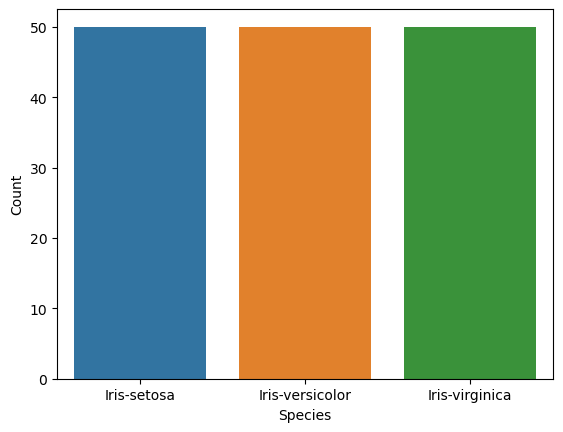

In [8]:
import seaborn
import matplotlib.pyplot as plot

viz = df["Species"].value_counts()
vizDF = pd.DataFrame({'Species': viz.index, 'Count': viz.values})

printmd("#### Number of Species:")
seaborn.barplot(x="Species", y="Count", data=vizDF)
plot.show()

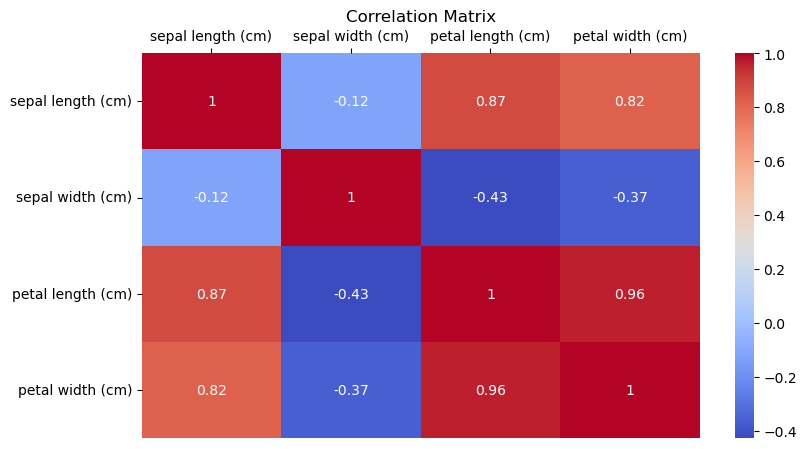

In [9]:
correlation_matrix = df_init.corr()

plot.figure(figsize=(9, 5))
heatmap = seaborn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
heatmap.set(xlabel="", ylabel="")
heatmap.xaxis.tick_top()
plot.title("Correlation Matrix")
plot.show()

#### Outlier Mining:

Sepal Length (Cm):



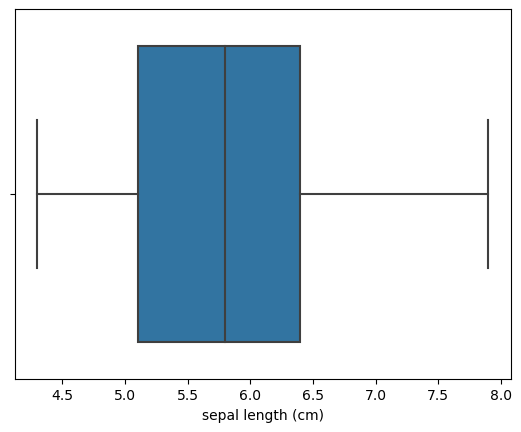


Sepal Width (Cm):



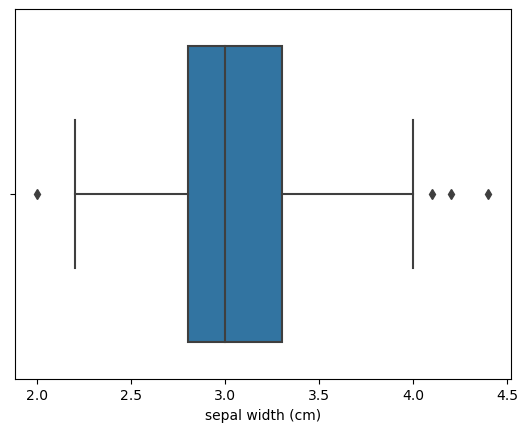


Petal Length (Cm):



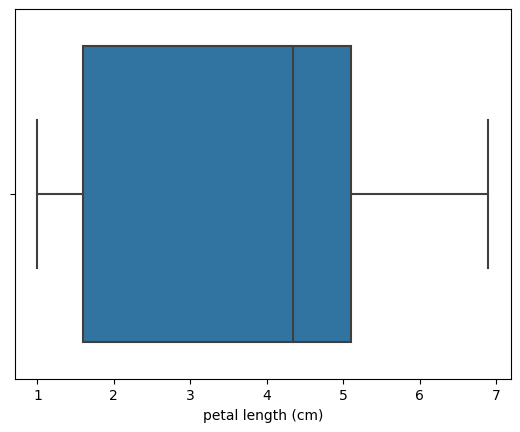


Petal Width (Cm):



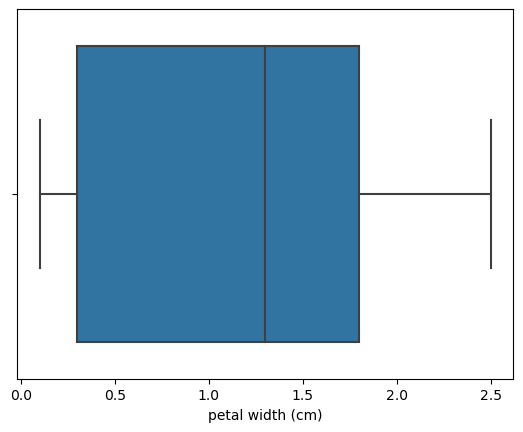

In [10]:
printmd("#### Outlier Mining:")

for i in df.columns[0:-1]:
    print(i.title() + ":\n")
    seaborn.boxplot(x=i, data=df)
    plot.show()
    print()

#### Scatter Plot Visualization:

Text(0, 0.5, 'Sepal Length')

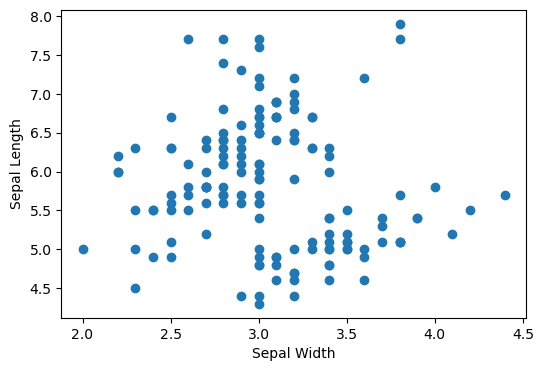

In [11]:
printmd("#### Scatter Plot Visualization:")

fig, scat = plot.subplots(figsize = (6,4))
scat.scatter(df['sepal width (cm)'], df['sepal length (cm)'])

scat.set_xlabel("Sepal Width")
scat.set_ylabel("Sepal Length")

Before removing outliers:


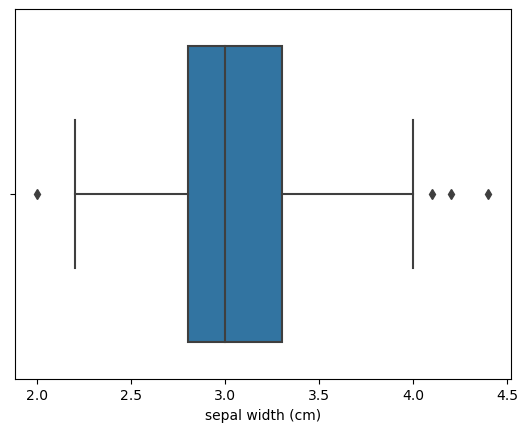

Maximum:  (array([15, 32, 33], dtype=int64),)
Minimum:  (array([60], dtype=int64),)

After removing outliers:


C:\Users\anshu\AppData\Local\Temp\ipykernel_31756\1034762093.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['sepal width (cm)'], 25, interpolation = 'midpoint')
C:\Users\anshu\AppData\Local\Temp\ipykernel_31756\1034762093.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['sepal width (cm)'], 75, interpolation = 'midpoint')


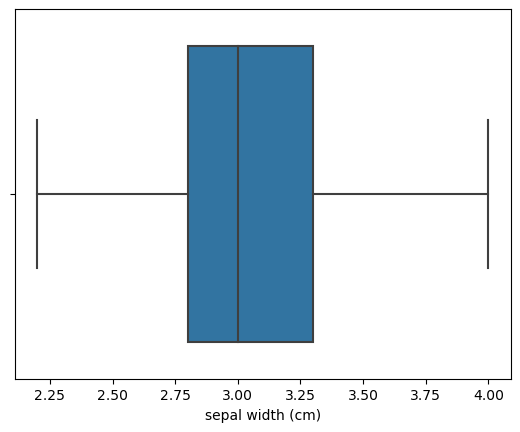

Old Shape:  (150, 5) 
New Shape:  (146, 5)


In [12]:
oldShape = df.shape
print("Before removing outliers:")
seaborn.boxplot(x='sepal width (cm)', data=df)
plot.show()
 

Q1 = np.percentile(df['sepal width (cm)'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['sepal width (cm)'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
  
maximum = np.where(df['sepal width (cm)'] >= (Q3+1.5*IQR))
minimum = np.where(df['sepal width (cm)'] <= (Q1-1.5*IQR))

print("Maximum: ", maximum)
print("Minimum: ", minimum)
 
df.drop(maximum[0], inplace = True)
df.drop(minimum[0], inplace = True)

print("\nAfter removing outliers:")
seaborn.boxplot(x='sepal width (cm)', data=df)
plot.show()

print("Old Shape: ", oldShape, "\nNew Shape: ", df.shape)

#### Number of Species After Removing Outliers:

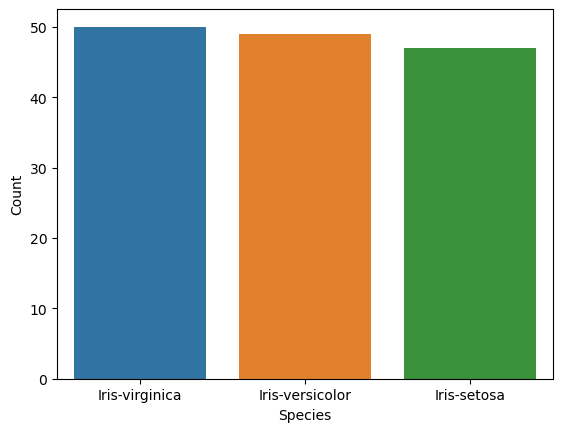

In [13]:
vizO = df["Species"].value_counts()
vizODF = pd.DataFrame({'Species': vizO.index, 'Count': vizO.values})

printmd("#### Number of Species After Removing Outliers:")
seaborn.barplot(x="Species", y="Count", data=vizODF)
plot.show()

#### Variable Relationships:

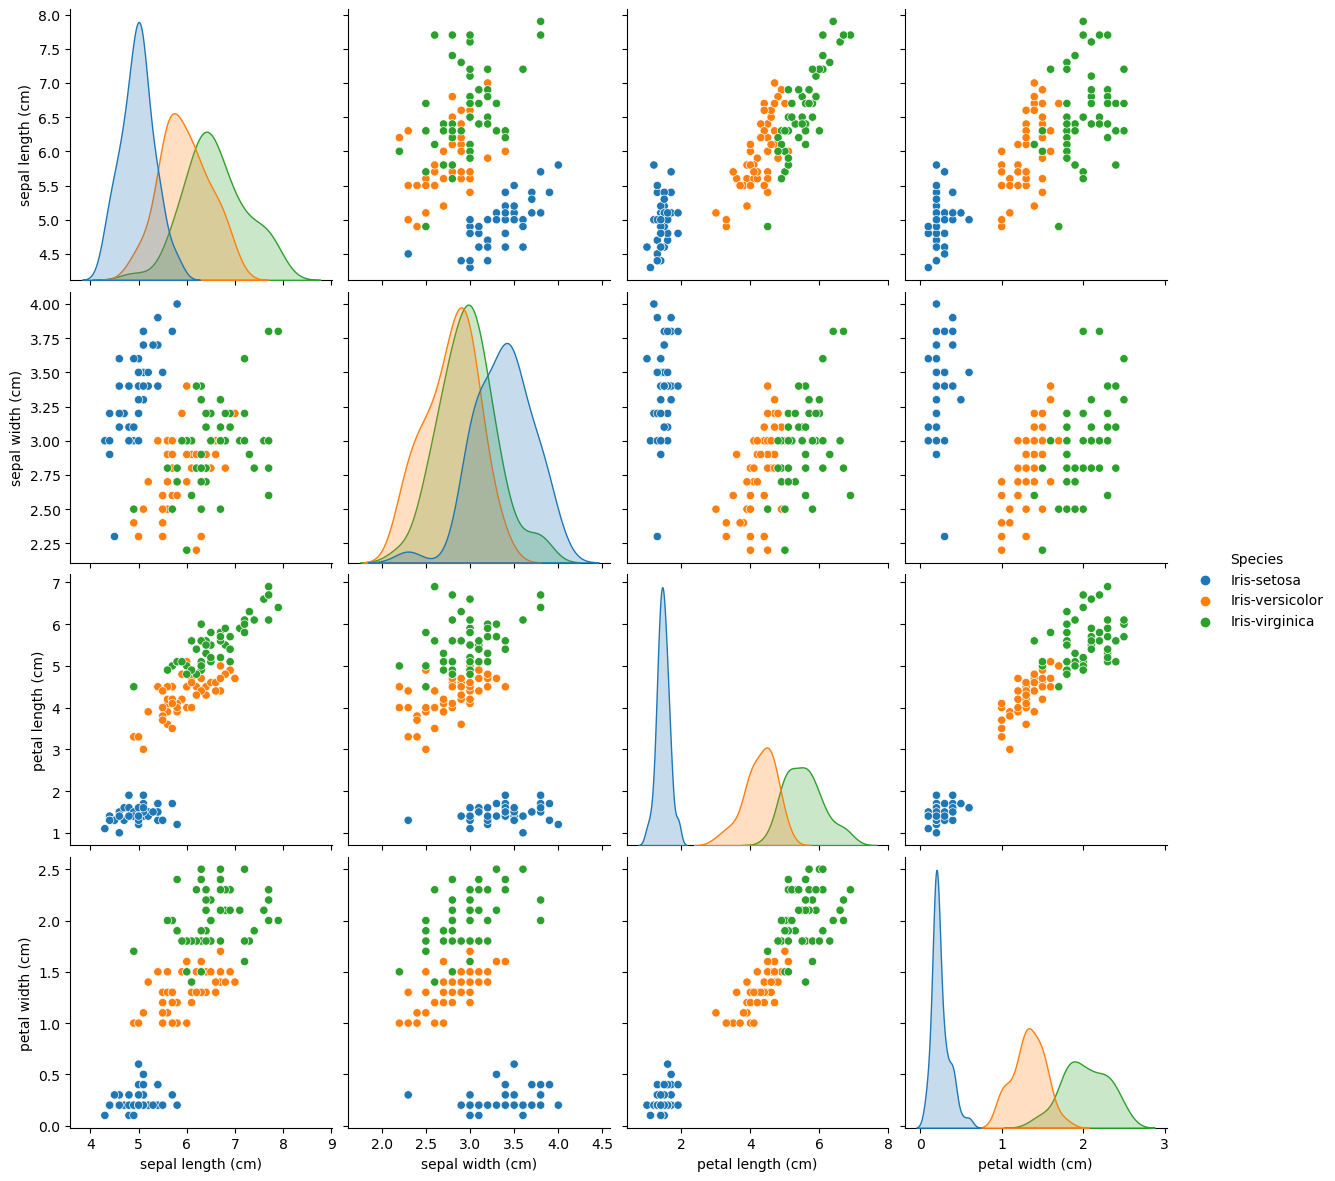

In [14]:
printmd("#### Variable Relationships:")

seaborn.pairplot(df,hue='Species', height=3)

In [15]:
printmd("# <center> Lab 3 <center>")

# <center> Lab 3 <center>

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Species")
Y = df["Species"]

feature_names = X.columns

labels = Y.unique()

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 100)

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
printmd("##### Model Accuracy: " + str(accuracy_score(y_test, predictions)*100))

##### Model Accuracy: 97.2972972972973

### Decision Tree Visualiziation: 

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.75\ngini = 0.666\nsamples = 109\nvalue = [34, 38, 37]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'x[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

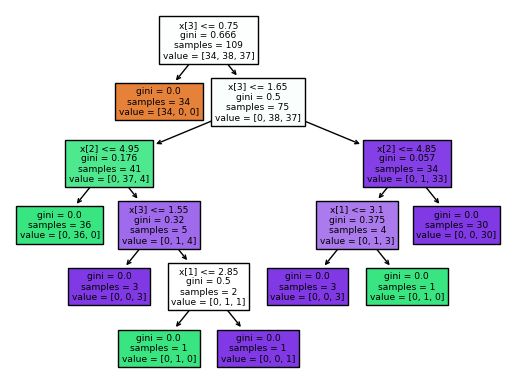

In [19]:
from sklearn import tree 

printmd("### Decision Tree Visualiziation: ")
tree.plot_tree(clf, filled=True)

### LAB 4

In [32]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test, predictions)
print("The accuracy score:",score)

The accuracy score: 0.972972972972973


In [36]:
cm = confusion_matrix(y_test, predictions,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

print("The confusion matrix is:\n",cm)

The confusion matrix is:
 [[13  0  0]
 [ 0 10  1]
 [ 0  0 13]]


In [38]:
TP=13 #cell (1,1)
FP=0 #sum of cell (2,1), (3,1)
TN=24
FN=1

In [40]:
TPR=TP/(TP+FN)
print("True Positve rate:",TPR)

True Positve rate: 0.9285714285714286


In [41]:
FPR=FP/(FP+TN)
print("The False Postive rate:",FPR)

The False Postive rate: 0.0


In [42]:
presi=TP/(TP+FP)
print("The precision:",presi)

The precision: 1.0


In [43]:
recall=TP/(TP+FN)
print("The recall:",recall)


The recall: 0.9285714285714286


In [44]:
F1= 2*presi*recall/(presi+recall)
print("The F1:",F1)

The F1: 0.962962962962963
